<a href="https://colab.research.google.com/github/Chris-Anderson23/7_8-Modular-Program/blob/master/Quadratic_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Libraries

In [1]:
!pip install whit-phys-util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from IPython.display import display_markdown

Mounted at /content/drive


# Connect to GitHub repository

In [3]:
repo = buc.local_repository("https://github.com/PS251-FA22/intro-to-colab-5-Chris-Anderson23")

Cloning repository from GitHub.


In [4]:
repo.pull(verbose=True)

Already up to date.


#Trial 1

## Import Excell Sheet

In [5]:
df1 = pd.read_excel("height-vs-time-data.xlsx","Trial 1")
df1

,Time (s),Height (m)
0,0.00,1.99
1,0.25,3.95
2,0.50,5.24
3,0.75,5.97
4,1.00,6.12
5,1.25,5.60
6,1.50,4.51
7,1.75,2.77
8,2.00,0.42


##Data analysis

Model: $y = c_0 t^2 + c_1 t+c_2$

In [6]:
fitTable1, fitFunc1 = buc.prettyPolyFit(df1['Time (s)'], df1['Height (m)'], deg=2,paramLabels=['c0', 'c1', 'c2'])
fitTable1

,c0,c1,c2
value,-4.892987,9.009307,1.985758
uncertainty,0.036127,0.075096,0.032208


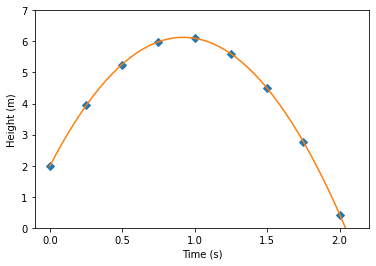

In [7]:
fig1, ax1 = plt.subplots()
ax1.plot(df1['Time (s)'], df1['Height (m)'], 'D');
ax1.set_xlabel("Time (s)");
ax1.set_ylabel("Height (m)");
ax1.set_ylim(0,7);
t_fit = np.linspace(0,2.1,50);
ax1.plot(t_fit, fitFunc1(t_fit));

In [8]:
fig1.savefig("height_vs_time_plot_trial1.png")
fig1.savefig("height_vs_time_plot_trial1.eps")

In [9]:
repo.push('Save PNG and EPS graphs','height_vs_time_plot_trial1.png height_vs_time_plot_trial1.eps',verbose=True)


        *************************************************************
        * Are you sure you want to push your changes?               *
        *                                                           *
        * Press "q" to abort. Press any other key to continue...    *
        *************************************************************
        y
[main a9d7a84] Save PNG and EPS graphs
 2 files changed, 988 insertions(+)
 create mode 100644 height_vs_time_plot_trial1.eps
 create mode 100644 height_vs_time_plot_trial1.png
git push
To https://github.com/PS251-FA22/intro-to-colab-5-Chris-Anderson23
   b209a44..a9d7a84  main -> main


In [10]:
g = -2*fitTable1.loc['value', 'c0']
dg = -2*fitTable1.loc['uncertainty', 'c0']
print(f"g = ({g:.2f} ± {dg:.2f}) m/s^2")

g = (9.79 ± -0.07) m/s^2


#Both trials

In [11]:
dfd = pd.read_excel("height-vs-time-data.xlsx", None)
dfd.keys()

dict_keys(['Trial 1', 'Trial 2'])

In [12]:
dfd['Trial 2']

,Time (s),Height (m)
0,0.00,1.61
1,0.25,3.84
2,0.50,5.66
3,0.75,6.82
4,1.00,7.48
5,1.25,7.54
6,1.50,7.11
7,1.75,5.78
8,2.00,3.73


In [18]:
fitTables = {}
fitFuncs = {}
for key in dfd.keys():
  fitTables[key], fitFuncs[key] = buc.prettyPolyFit(dfd[key]['Time (s)'], dfd[key]['Height (m)'], deg=2, paramLabels=['c0', 'c1', 'c2'])

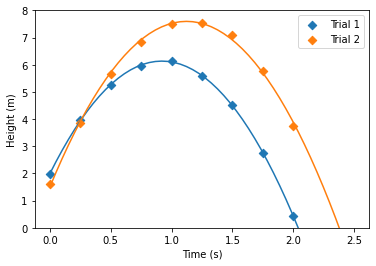

In [23]:
fig2, ax2 = plt.subplots()
t_fit = np.linspace(0,2.5,50)
for key in dfd.keys():
  ax2.scatter(dfd[key]['Time (s)'], dfd[key]['Height (m)'], marker='D', label=key)
  ax2.plot(t_fit, fitFuncs[key](t_fit))
ax2.set_xlabel('Time (s)');
ax2.set_ylabel('Height (m)');
ax2.set_ylim(0,8);
ax2.legend();

In [20]:
fitTables['Trial 1']

,c0,c1,c2
value,-4.892987,9.009307,1.985758
uncertainty,0.036127,0.075096,0.032208


In [21]:
fitTables['Trial 2']

,c0,c1,c2
value,-4.831515,10.857697,1.494727
uncertainty,0.239195,0.497206,0.213245


In [22]:
for key in dfd.keys():
  display_markdown(f"### {key}", raw=True)
  display(fitTables[key])
  print()

### Trial 1

,c0,c1,c2
value,-4.892987,9.009307,1.985758
uncertainty,0.036127,0.075096,0.032208


### Trial 2

,c0,c1,c2
value,-4.831515,10.857697,1.494727
uncertainty,0.239195,0.497206,0.213245


In [ ]:
buc.notebook_to_pdf(repo, author="Christopher Anderson", title="Quadratic fits and Excel files")